In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, make_scorer
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


In [5]:
data = np.genfromtxt('./dados_tratados.csv', delimiter=',')

In [6]:
X = data[:, :-1]  
y = data[:, -1]

X_treino_full, X_teste_final, y_treino_full, y_teste_final = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
ks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

pipeline_grid = Pipeline([
    ('sampler', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': ks
}

grid_search = GridSearchCV(pipeline_grid, param_grid, cv=cv, scoring=make_scorer(f1_score), n_jobs=-1)
grid_search.fit(X_treino_full, y_treino_full)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1-score: {grid_search.best_score_:.4f}")



Best parameters: {'knn__n_neighbors': 1}
Best F1-score: 0.8465


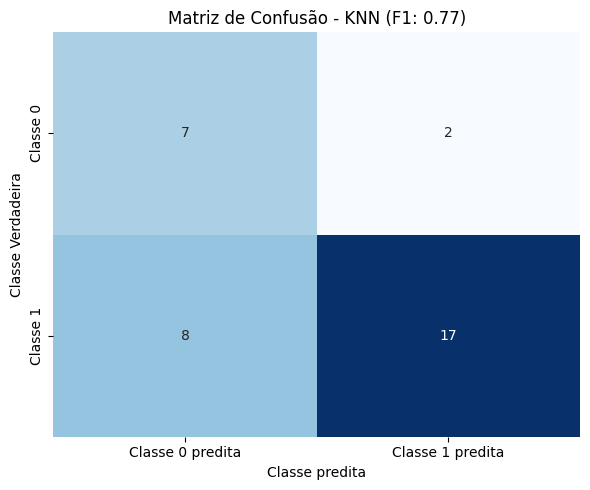

In [8]:
# The best estimator (including the best sampler and k) is now grid_search.best_estimator_
final_pipeline = grid_search.best_estimator_
y_pred = final_pipeline.predict(X_teste_final)

# Matriz de confusão
cm = confusion_matrix(y_teste_final, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0 predita', 'Classe 1 predita'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Classe predita')
plt.ylabel('Classe Verdadeira')
plt.title(f'Matriz de Confusão - KNN (F1: {f1_score(y_teste_final, y_pred):.2f})')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score
)

acc = accuracy_score(y_teste_final, y_pred)
recal = recall_score(y_teste_final, y_pred)
precis = precision_score(y_teste_final, y_pred)
f1 = f1_score(y_teste_final, y_pred)

print("Estatísticas KNN:")

print(f"Acurácia: {acc:.4f}")
print(f"Revocação: {recal:.4f}")
print(f"Precisão: {precis:.4f}")
print(f"F1-score: {f1:.4f}")


Estatísticas KNN:
Acurácia: 0.7059
Revocação: 0.6800
Precisão: 0.8947
F1-score: 0.7727
